In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


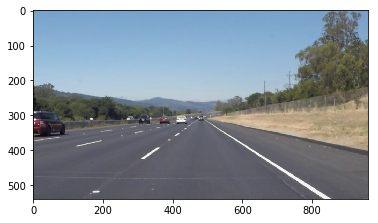

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  
# if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    leftx = []
    lefty = []
    rightx = []
    righty = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            if ((y2-y1)/(x2-x1)) > 0:
                rightx.append(x1)
                rightx.append(x2)
                righty.append(y1)
                righty.append(y2)
            else:
                leftx.append(x1)
                leftx.append(x2)
                lefty.append(y1)
                lefty.append(y2)
                
    #print(len(leftx))
    #print(len(lefty))
    #print(len(rightx))
    #print(len(righty))
    
    coef_left = np.polyfit(leftx, lefty, 1)
    coef_right = np.polyfit(rightx, righty, 1)
    
    y_top = int(abs((1.15*img.shape[0])/2))
    y_bottom = int(abs(img.shape[0]))
    
    leftx_bottom = int(abs((y_bottom-coef_left[1])/coef_left[0]))
    rightx_bottom = int(abs((y_bottom-coef_right[1])/coef_right[0]))
    
    leftx_top = int(abs((y_top-coef_left[1])/coef_left[0]))
    rightx_top = int(abs((y_top-coef_right[1])/coef_right[0]))
    
    #print((leftx_bottom,y_bottom), (leftx_top,y_top))
    #print((rightx_bottom,y_bottom), (rightx_top,y_top))
    
    cv2.line(img, (leftx_bottom,y_bottom), (leftx_top,y_top), color,thickness)
    cv2.line(img, (rightx_bottom,y_bottom), (rightx_top,y_top), color, thickness)
    #print(lines)
    #for line in lines:
    #    for x1,y1,x2,y2 in line:
    #        cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

True

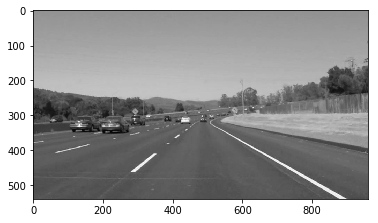

In [5]:
image_path = 'test_images/solidWhiteCurve.jpg'
image = mpimg.imread(image_path)
grayimage = grayscale(image)
plt.imshow(grayimage, cmap='gray')
cv2.imwrite('output_images/01_grayscale.png', grayimage)

(540, 960)


True

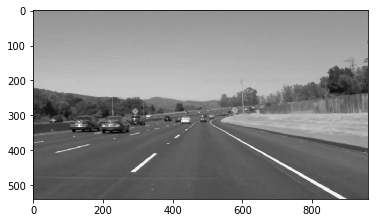

In [6]:
#then apply the guassian blur 
grayimage = gaussian_blur(grayimage,3)
print(grayimage.shape)
plt.imshow(grayimage, cmap='gray')
cv2.imwrite('output_images/02_gaussian_blur.png', grayimage)

(540, 960)


True

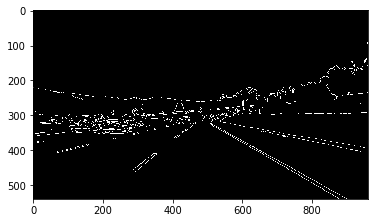

In [7]:
#then apply the canny edge detector
edges = canny(img=grayimage ,low_threshold=50,high_threshold=150)
print(edges.shape)
plt.imshow(edges, cmap='gray')
cv2.imwrite('output_images/03_canny_edge.png', edges)

(540, 960)


True

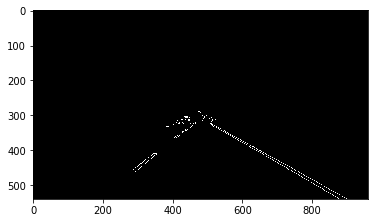

In [16]:
#then the region of interest
imshape = image.shape
y_length = imshape[0]-1
x_length = imshape[1]-1
road_top_y = 1.075*imshape[0]/2 #top with respect to the image of the view port
road_left_x = imshape[1]*0.48 #left with respect to the image of the view port
road_right_x = imshape[1]*0.5 
print 
viewport = np.array([[(0,y_length),(road_left_x, road_top_y),(road_right_x, road_top_y),(x_length, y_length)]],dtype=np.int32)
#viewport = np.array([[(0,y_length),(0,0),(x_length, 0),(x_length, y_length)]],dtype=np.int32)
roi_image = region_of_interest(edges, viewport)
print(roi_image.shape)
plt.imshow(roi_image, cmap='gray')
cv2.imwrite('output_images/04_roi_image.png', roi_image)

(540, 960, 3)


True

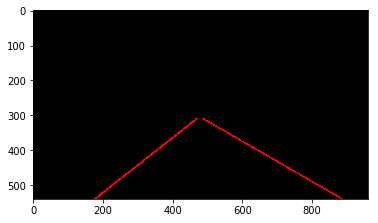

In [9]:

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 6
min_line_length = 15
max_line_gap = 10

line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = hough_lines(roi_image, rho, theta, threshold, min_line_length, max_line_gap)

print(lines.shape)
plt.imshow(lines)
cv2.imwrite('output_images/05_houghxform_lines.png', lines)


True

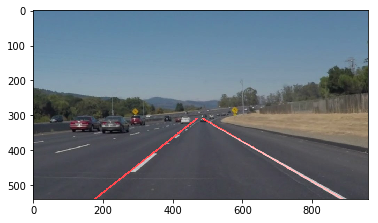

In [10]:

# Draw the lines on the edge image
combo = weighted_img(lines, image, 0.8, 1, 0) 
plt.imshow(combo)
cv2.imwrite('output_images/06_final_merged_image.png', combo)

In [11]:
#step 1 : grayscale
def grayscale_image(image):
    grayimage = grayscale(image)
    #plt.imshow(grayimage, cmap='gray')
    return grayimage
    
#step 2 : gaussian blur
def gaussian_blur_image(image):
    gb_image = gaussian_blur(image,3)
    #print(gb_image.shape)
    #plt.imshow(gb_image, cmap='gray')
    return gb_image

#step 3: detect edges
def edge_detection_image(image):
    edges = canny(img=image ,low_threshold=100,high_threshold=200)
    #print(edges.shape)
    #plt.imshow(edges, cmap='gray')
    return edges

#step 4: region of interest
def roi_image(image):
    imshape = image.shape
    y_length = imshape[0]-1
    x_length = imshape[1]-1
    road_top_y = 1.175*imshape[0]/2 #top with respect to the image of the view port
    road_left_x = imshape[1]*0.48 #left with respect to the image of the view port
    road_right_x = imshape[1]*0.5 #right with respect to the image of the view port
    viewport = np.array([[(0,y_length),(road_left_x, road_top_y),(road_right_x, road_top_y),(x_length, y_length)]],dtype=np.int32)
    #viewport = np.array([[(0,y_length),(0,0),(x_length, 0),(x_length, y_length)]],dtype=np.int32)
    roi_image = region_of_interest(image, viewport)
    #print(roi_image.shape)
    #plt.imshow(roi_image, cmap='gray')
    return roi_image

#step 5: hough transform
def hough_xform_image(image):
    rho = 1
    theta = np.pi/180
    threshold = 6
    min_line_length = 15
    max_line_gap = 10
    # Run Hough on edge detected image
    line_image = hough_lines(image, rho, theta, threshold, min_line_length, max_line_gap)
    #print(line_image.shape)
    #plt.imshow(line_image)
    return line_image

#step 6: image overlay
def overlay_line_image(image, line_image):
    overlay_image = weighted_img(line_image, image, 0.8, 1, 0) 
    #plt.imshow(overlay_image)
    return overlay_image



In [12]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [13]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    image_copy = np.copy(image)
    img = grayscale_image(image_copy)
    img = gaussian_blur_image(img)
    img = edge_detection_image(img)
    img = roi_image(img)
    img = hough_xform_image(img)
    img = overlay_line_image(image_copy, img)
    result=img
    return result

In [14]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
#white_output = 'chall.mp4'
#clip1 = VideoFileClip("challenge.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:02<00:00, 101.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 1.89 s, sys: 545 ms, total: 2.44 s
Wall time: 2.5 s
